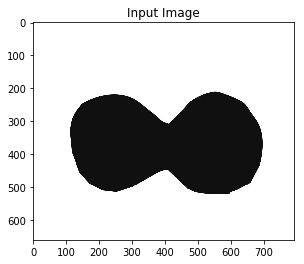

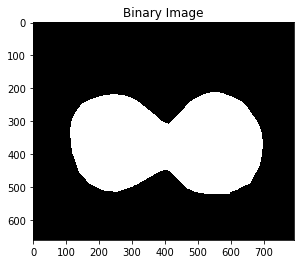

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import morphology,feature

img = cv2.imread('test_002.png')
ret,gray = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,gray_inv = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

#Input Image
plt.imshow(img)
plt.title('Input Image')
plt.show()

plt.imshow(gray_inv)
plt.title('Binary Image')
plt.show()

In [32]:
distance = ndi.distance_transform_edt(gray_inv)
#print(distance)

In [33]:
local_maxi =feature.peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=gray_inv)
markers = ndi.label(local_maxi)[0] 
labels =morphology.watershed(-distance, markers, mask=gray_inv) 


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.ravel()
ax0, ax1, ax2, ax3 = axes


#gray_inv = gray_inv/255.
#distance = distance/255


ax0.imshow(gray_inv, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title("Original")
ax1.imshow(-distance, cmap=plt.cm.jet, interpolation='nearest')
ax1.set_title("Distance")

#plt.imshow((out * 255).astype(np.uint8))


RuntimeError: sequence argument must have length equal to input rank